# Library

In [1]:
import os
import sys
import numpy as np
from matplotlib.pyplot import imread
import gzip
import pandas as pd
from time import time
print("OS: ", sys.platform)
print("Python: ", sys.version)
# MXnet
import mxnet as mx
from mxnet import nd, autograd
from mxnet import gluon
from mxnet.gluon import nn
print("MXNet version", mx.__version__) # Matteo 1.5.1
# Tensorflow
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

from tensorflow.keras import applications
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
print("Tensorflow version (by Google): ", tf.__version__)

OS:  darwin
Python:  3.7.6 (v3.7.6:43364a7ae0, Dec 18 2019, 14:18:50) 
[Clang 6.0 (clang-600.0.57)]
MXNet version 1.5.1
Tensorflow version (by Google):  2.0.0


# Set GPU usage

In [2]:
# MXNET
gpus = mx.test_utils.list_gpus()
ctx =  [mx.gpu()] if gpus else [mx.cpu(0), mx.cpu(1)]
print(ctx)

[cpu(0), cpu(1)]


In [3]:
# TENSORFLOW

# Control reproducibility

The most common form of randomness used in neural networks is the random initialization of the network weights. Although randomness can be used in other areas, here is just a short list:

- Randomness in Initialization, such as weights.
- Randomness in Regularization, such as dropout.
- Randomness in Layers, such as word embedding.
- Randomness in Optimization, such as stochastic optimization.

source: https://machinelearningmastery.com/reproducible-results-neural-networks-keras/

In [4]:
import random
np.random.seed(42)
random.seed(42)
for computing_unit in ctx:
    mx.random.seed(42, ctx = computing_unit)
tf.random.set_seed(42)

In [5]:
# dimensions of our images.
IMG_WIDTH, IMG_HEIGHT = 299, 299
BATCH_SIZE = 5
EPOCHS = 5
NR_SAMPLES_TRAIN = 65
NR_SAMPLES_VALI = 10

# Original folder
original_train_data_dir = 'Open_I_abd_vs_CXRs/TRAIN' #location of training data
original_validation_data_dir = 'Open_I_abd_vs_CXRs/VAL' #location of validation data

# new augmented folder
train_data_dir = 'Data_Augmented_Medical_Images/TRAIN' #location of training data
validation_data_dir = 'Data_Augmented_Medical_Images/VAL' #location of validation data

# Create Augmented data with Keras
Source: https://stackoverflow.com/questions/47826730/how-to-save-resized-images-using-imagedatagenerator-and-flow-from-directory-in-k

In [6]:
# Crete the data generator

# nr example to generate
nr_train_img_to_generate = 80
nr_vali_img_to_generate = 15

train_datagen = ImageDataGenerator(
        rescale=1./255,            # normalize pixel values to [0,1]
        shear_range=0.2,      
        zoom_range=0.2,    
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True)  


val_datagen = ImageDataGenerator(
         rescale=1./255)       # normalize pixel values to [0,1]

In [7]:
help(train_datagen)

Help on ImageDataGenerator in module tensorflow.python.keras.preprocessing.image object:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Arguments:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 

In [23]:
i = 0
for batch in train_datagen.flow_from_directory(original_train_data_dir, target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary', shuffle=True, batch_size=BATCH_SIZE,
    save_to_dir = train_data_dir, save_prefix='aug'):
    i += 1
    if i > nr_train_img_to_generate: # save 20 images
        break  # otherwise the generator would loop indefinitely
        
i = 0
for batch in val_datagen.flow_from_directory(original_validation_data_dir, target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary', shuffle=True, batch_size=BATCH_SIZE,
    save_to_dir = validation_data_dir, save_prefix='aug'):
    i += 1
    if i > nr_vali_img_to_generate: # save 20 images
        break  # otherwise the generator would loop indefinitely

Found 65 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


# Read Data 

In [12]:
# TENSORFLOW

augmented_train_data_gen = train_datagen.flow_from_directory(directory = original_train_data_dir,
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_vali_data_gen = val_datagen.flow_from_directory(directory = original_validation_data_dir,
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH))


Found 65 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [9]:
train_data_dir


'Data_Augmented_Medical_Images/TRAIN'

In [ ]:
# MXNET

# Download pretrained Model

In [8]:
# TENSORFLOW
base_model = applications.inception_v3.InceptionV3(include_top=False, weights=None, input_tensor=None, 
                          input_shape=(IMG_WIDTH, IMG_HEIGHT, 3), pooling=None)
base_model.load_weights("weights/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5")

In [ ]:
# MXNET
from gluoncv.model_zoo import get_model



# Attach last layer

In [ ]:
# TENSORFLOW

In [ ]:
# MXNET

In [9]:
model_top = Sequential()
model_top.add(GlobalAveragePooling2D(input_shape=base_model.output_shape[1:], data_format=None)),  
model_top.add(Dense(256, activation='relu'))
model_top.add(Dropout(0.5))
model_top.add(Dense(1, activation='sigmoid')) 

model = Model(inputs=base_model.input, outputs=model_top(base_model.output))

model.compile(optimizer=Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08,decay=0.0), loss='binary_crossentropy', metrics=['accuracy'])

# Train - Finetuning

In [ ]:
# TENSORFLOW

In [ ]:
# MXNET

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [13]:
# 20 epoch -> 15 min - on a 16gb RAM CPU-restricted Desktop

history = model.fit_generator(
            augmented_train_data_gen,
            steps_per_epoch = NR_SAMPLES_TRAIN // BATCH_SIZE,
            epochs= EPOCHS,
            validation_data = augmented_vali_data_gen,
            validation_steps= NR_SAMPLES_VALI // BATCH_SIZE)


Epoch 1/5


ValueError: A target array with shape (5, 2) was passed for an output of shape (None, 1) while using as loss `binary_crossentropy`. This loss expects targets to have the same shape as the output.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


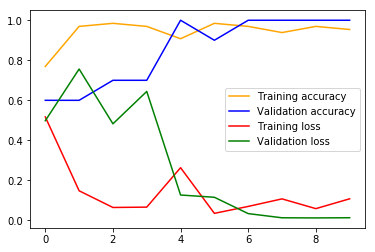

In [7]:
import matplotlib.pyplot as plt

print(history.history.keys())

plt.figure()
plt.plot(history.history['accuracy'], 'orange', label='Training accuracy')
plt.plot(history.history['val_accuracy'], 'blue', label='Validation accuracy')
plt.plot(history.history['loss'], 'red', label='Training loss')
plt.plot(history.history['val_loss'], 'green', label='Validation loss')
plt.legend()
plt.show()


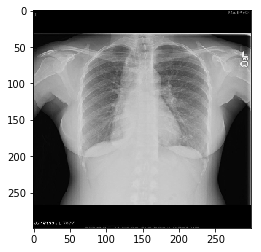

Predicted: [[0.00026237]] Chest X-ray


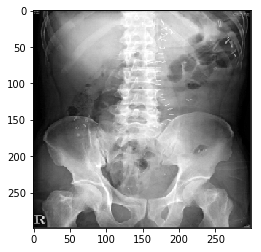

Predicted: [[0.9998467]] Abd X-ray


In [8]:
import numpy as np
from tensorflow.keras.preprocessing import image

img_path1='Open_I_abd_vs_CXRs/TEST/chest2.png' #change to location of chest x-ray
img_path2='Open_I_abd_vs_CXRs/TEST/abd2.png'  #change to location of abd x-ray
img1 = image.load_img(img_path1, target_size=(img_width, img_height))
img2 = image.load_img(img_path2, target_size=(img_width, img_height))
plt.imshow(img1)
plt.show()

img1 = image.img_to_array(img1)
x1 = np.expand_dims(img1, axis=0) * 1./255
score1 = model.predict(x1)
print('Predicted:', score1, 'Chest X-ray' if score1 < 0.5 else 'Abd X-ray')

plt.imshow(img2)
plt.show()

img2 = image.img_to_array(img2)
x2 = np.expand_dims(img2, axis=0) * 1./255
score2 = model.predict(x2)
print('Predicted:', score2, 'Chest X-ray' if score2 < 0.5 else 'Abd X-ray')


# Shap

In [9]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions
import numpy as np
import shap
import keras.backend as K
import json

Using TensorFlow backend.


In [10]:
my_to_explain = np.stack([x1.squeeze(), x2.squeeze()])
print(type(my_to_explain), my_to_explain.shape)

<class 'numpy.ndarray'> (2, 299, 299, 3)


In [11]:
e = shap.GradientExplainer(model, my_to_explain)
shap_values, indexes = e.shap_values(my_to_explain, ranked_outputs=1)

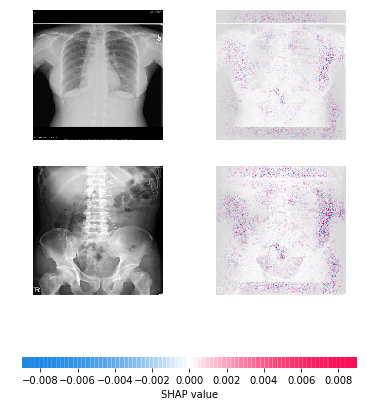

In [12]:
# plot the explanations
shap.image_plot(shap_values, my_to_explain)

# Eliminate black bands

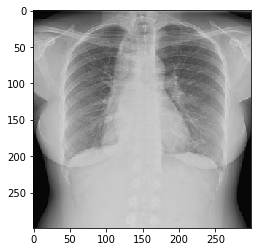

Predicted: [[2.097506e-06]] Chest X-ray


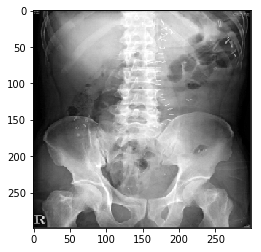

Predicted: [[0.9998467]] Abd X-ray


In [13]:
import numpy as np
from tensorflow.keras.preprocessing import image

img_path1_rescaled='Open_I_abd_vs_CXRs/TEST_RESCALED/chest2.png' #change to location of chest x-ray
img_path2_rescaled='Open_I_abd_vs_CXRs/TEST_RESCALED/abd2.png'  #change to location of abd x-ray
img1_rescaled = image.load_img(img_path1_rescaled, target_size=(img_width, img_height))
img2_rescaled = image.load_img(img_path2_rescaled, target_size=(img_width, img_height))
plt.imshow(img1_rescaled)
plt.show()

img1_rescaled = image.img_to_array(img1_rescaled)
x1_rescaled = np.expand_dims(img1_rescaled, axis=0) * 1./255
score1_rescaled = model.predict(x1_rescaled)
print('Predicted:', score1_rescaled, 'Chest X-ray' if score1_rescaled < 0.5 else 'Abd X-ray')

plt.imshow(img2_rescaled)
plt.show()

img2_rescaled = image.img_to_array(img2_rescaled)
x2_rescaled = np.expand_dims(img2_rescaled, axis=0) * 1./255
score2_rescaled = model.predict(x2_rescaled)
print('Predicted:', score2_rescaled, 'Chest X-ray' if score2_rescaled < 0.5 else 'Abd X-ray')

<class 'numpy.ndarray'> (2, 299, 299, 3)


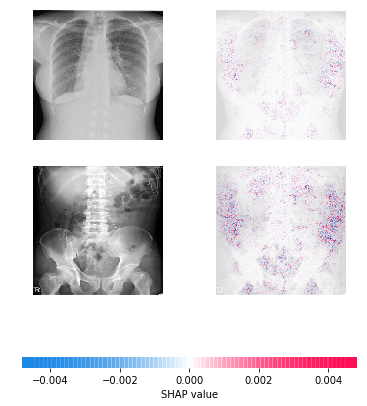

In [14]:
my_to_explain_rescaled = np.stack([x1_rescaled.squeeze(), x2_rescaled.squeeze()])
print(type(my_to_explain_rescaled), my_to_explain_rescaled.shape)

e = shap.GradientExplainer(model, my_to_explain_rescaled)
shap_values_rescaled, indexes_rescaled = e.shap_values(my_to_explain_rescaled, ranked_outputs=1)

# plot the explanations
shap.image_plot(shap_values_rescaled, my_to_explain_rescaled)